# IEOR 142 Final Project: Predicting Flight Cancellations

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re


In [2]:
data_2020 = pd.read_csv(r'/Users/joansuwandi/Documents/Combined_Flights_2020.csv')
data_2021 = pd.read_csv(r'/Users/joansuwandi/Documents/Combined_Flights_2021.csv')
data_2022 = pd.read_csv(r'/Users/joansuwandi/Documents/Combined_Flights_2022.csv')

In [3]:
print('2020:' , len(data_2020))
print('2021:' , len(data_2021))
print('2022:' , len(data_2022))

2020: 5022397
2021: 6311871
2022: 4078318


In [4]:
data_2020.head()

,FlightDate,Airline,Origin,Dest,Cancelled,Diverted,CRSDepTime,DepTime,DepDelayMinutes,DepDelay,...,WheelsOff,WheelsOn,TaxiIn,CRSArrTime,ArrDelay,ArrDel15,ArrivalDelayGroups,ArrTimeBlk,DistanceGroup,DivAirportLandings
0,2020-09-01,Comair Inc.,PHL,DAY,False,False,1905,1858.0,0.0,-7.0,...,1914.0,2030.0,4.0,2056,-22.0,0.0,-2.0,2000-2059,2,0.0
1,2020-09-02,Comair Inc.,PHL,DAY,False,False,1905,1858.0,0.0,-7.0,...,1914.0,2022.0,5.0,2056,-29.0,0.0,-2.0,2000-2059,2,0.0
2,2020-09-03,Comair Inc.,PHL,DAY,False,False,1905,1855.0,0.0,-10.0,...,2000.0,2117.0,5.0,2056,26.0,1.0,1.0,2000-2059,2,0.0
3,2020-09-04,Comair Inc.,PHL,DAY,False,False,1905,1857.0,0.0,-8.0,...,1910.0,2023.0,4.0,2056,-29.0,0.0,-2.0,2000-2059,2,0.0
4,2020-09-05,Comair Inc.,PHL,DAY,False,False,1905,1856.0,0.0,-9.0,...,1910.0,2022.0,4.0,2056,-30.0,0.0,-2.0,2000-2059,2,0.0


In [5]:
# Year 2020-2021 for train and Year 2022 for test
train = pd.concat([data_2020,data_2021],axis=0)
test = data_2022

## EDA

In [6]:
train['Airline'].value_counts()

Southwest Airlines Co.                       2025916
SkyWest Airlines Inc.                        1350329
Delta Air Lines Inc.                         1329099
American Airlines Inc.                       1306205
United Air Lines Inc.                         755054
Republic Airlines                             552698
Endeavor Air Inc.                             478324
Envoy Air                                     467186
Comair Inc.                                   415215
JetBlue Airways                               346865
Alaska Airlines Inc.                          327181
Spirit Air Lines                              326463
Mesa Airlines Inc.                            295716
Frontier Airlines Inc.                        228317
Allegiant Air                                 214370
Horizon Air                                   207691
Capital Cargo International                   171690
Air Wisconsin Airlines Corp                   134245
Commutair Aka Champlain Enterprises, Inc.     

In [7]:
# Check correlation between arrival times columns
correlation_matrix_arrival = train[["CRSArrTime","ArrTime", 'ArrDelay',"ArrDelayMinutes","ArrDel15", 'ArrivalDelayGroups',"ArrTimeBlk"]].corr()
correlation_matrix_arrival

,CRSArrTime,ArrTime,ArrDelay,ArrDelayMinutes,ArrDel15,ArrivalDelayGroups
CRSArrTime,1.000000,0.879108,0.051371,0.046040,0.087013,0.071225
ArrTime,0.879108,1.000000,0.026602,0.016644,0.068925,0.048952
ArrDelay,0.051371,0.026602,1.000000,0.976524,0.584685,0.844352
ArrDelayMinutes,0.046040,0.016644,0.976524,1.000000,0.534450,0.780941
ArrDel15,0.087013,0.068925,0.584685,0.534450,1.000000,0.758306
ArrivalDelayGroups,0.071225,0.048952,0.844352,0.780941,0.758306,1.000000


<AxesSubplot:>

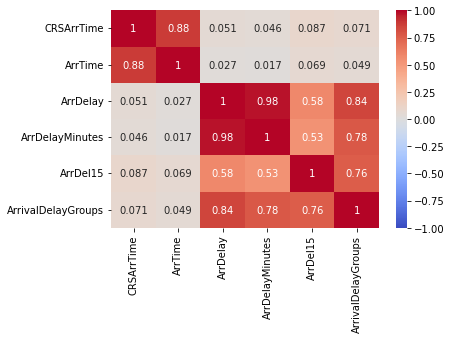

In [8]:
# Create a heatmap
sns.heatmap(correlation_matrix_arrival, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
#keep: "ArrTime", 'ArrDelay' since it has lowest correlation

In [9]:
# Check correlation between destination columns
correlation_matrix_dest = train[["Dest",'DestAirportID', 'DestAirportSeqID', 'DestCityMarketID', 'DestCityName','DestState', 'DestStateFips', 'DestStateName', 'DestWac']].corr()
correlation_matrix_dest

,DestAirportID,DestAirportSeqID,DestCityMarketID,DestStateFips,DestWac
DestAirportID,1.000000,1.000000,0.630442,-0.072334,0.226004
DestAirportSeqID,1.000000,1.000000,0.630442,-0.072336,0.226003
DestCityMarketID,0.630442,0.630442,1.000000,0.030098,0.028467
DestStateFips,-0.072334,-0.072336,0.030098,1.000000,-0.024683
DestWac,0.226004,0.226003,0.028467,-0.024683,1.000000


<AxesSubplot:>

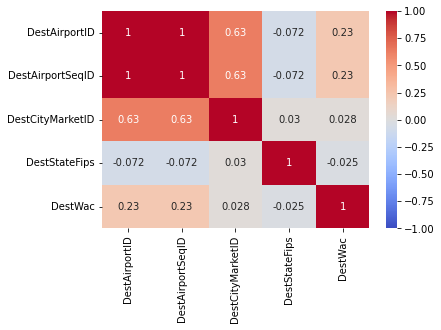

In [10]:
# Create a heatmap
sns.heatmap(correlation_matrix_dest, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
#keep: 'DestAirportID', 'DestCityMarketID', 'DestStateFips', 'DestWac'

In [11]:
# Drop columns that are repetitive/redundat or that could lead to multicolinearity
cols_to_drop = ['Dest', 'DestAirportSeqID', 'DestCityName', 'DestState',  'DestStateName',  # Destination columns 
                'Origin', 'OriginAirportSeqID', 'OriginCityName', 'OriginState',  'OriginStateName', "Operating_Airline", # Origin columns
                "DOT_ID_Marketing_Airline","IATA_Code_Marketing_Airline","Operated_or_Branded_Code_Share_Partners", # Airline codes/info unnecesary 
                "Operating_Airline","DOT_ID_Operating_Airline","IATA_Code_Operating_Airline", "Flight_Number_Marketing_Airline",
                "DepDelayMinutes",'DepDel15', 'DepartureDelayGroups', "DepTimeBlk", #Departure times
                "CRSArrTime", "ArrDelayMinutes","ArrDel15",'ArrivalDelayGroups' ,"ArrTimeBlk", # Arrival times
                "Marketing_Airline_Network", 'Tail_Number' ]

In [12]:
# Top 5 airlines for train and test

#top_5_airlines= train['Airline'].value_counts().index[:5].tolist()
top_3_airlines= train['Airline'].value_counts().index[:3].tolist()
top_3_airlines_test = test['Airline'].value_counts().index[:3].tolist()

train = train.loc[train['Airline'].isin(top_3_airlines)].drop(columns = cols_to_drop)
test = test.loc[test['Airline'].isin(top_3_airlines)].drop(columns = cols_to_drop)

print(f"Top 3 Airlines:\n{top_3_airlines}")
train.head()

Top 3 Airlines:
['Southwest Airlines Co.', 'SkyWest Airlines Inc.', 'Delta Air Lines Inc.']


,FlightDate,Airline,Cancelled,Diverted,CRSDepTime,DepTime,DepDelay,ArrTime,AirTime,CRSElapsedTime,...,DestCityMarketID,DestStateFips,DestWac,TaxiOut,WheelsOff,WheelsOn,TaxiIn,ArrDelay,DistanceGroup,DivAirportLandings
38655,2020-09-03,Southwest Airlines Co.,False,False,825,824.0,-1.0,941.0,55.0,70.0,...,30466,4,81,14.0,838.0,933.0,8.0,6.0,2,0.0
38656,2020-09-03,Southwest Airlines Co.,False,False,1905,1903.0,-2.0,2004.0,52.0,70.0,...,32457,6,91,6.0,1909.0,2001.0,3.0,-11.0,2,0.0
38657,2020-09-03,Southwest Airlines Co.,False,False,1505,1459.0,-6.0,1559.0,49.0,70.0,...,32457,6,91,8.0,1507.0,1556.0,3.0,-16.0,2,0.0
38658,2020-09-03,Southwest Airlines Co.,False,False,1105,1102.0,-3.0,1213.0,48.0,70.0,...,32457,6,91,11.0,1113.0,1201.0,12.0,-2.0,2,0.0
38659,2020-09-03,Southwest Airlines Co.,False,False,1825,1825.0,0.0,1941.0,63.0,80.0,...,33192,6,91,10.0,1835.0,1938.0,3.0,-4.0,2,0.0


In [13]:
train.columns.values

array(['FlightDate', 'Airline', 'Cancelled', 'Diverted', 'CRSDepTime',
       'DepTime', 'DepDelay', 'ArrTime', 'AirTime', 'CRSElapsedTime',
       'ActualElapsedTime', 'Distance', 'Year', 'Quarter', 'Month',
       'DayofMonth', 'DayOfWeek', 'Flight_Number_Operating_Airline',
       'OriginAirportID', 'OriginCityMarketID', 'OriginStateFips',
       'OriginWac', 'DestAirportID', 'DestCityMarketID', 'DestStateFips',
       'DestWac', 'TaxiOut', 'WheelsOff', 'WheelsOn', 'TaxiIn',
       'ArrDelay', 'DistanceGroup', 'DivAirportLandings'], dtype=object)

In [14]:
columns_train = pd.Series(train.columns.values)
columns_test =  pd.Series(test.columns.values)
not_equal_values = (columns_train == columns_test).all()
not_equal_values

True

In [15]:
print('train:', len(train))
print('test :',len(test))

train: 4705344
test : 1684846


### Feature Engineering

In [16]:
#Making a column that accounts for weekend (1 if weekend else 0)
def is_weekend(day):
    if day in [6, 7]:
        return 1
    else:
        return 0

train['Weekend'] = train['DayOfWeek'].apply(is_weekend)
test['Weekend'] = test['DayOfWeek'].apply(is_weekend)


In [17]:
train["Weekend"].head(10)

38655    0
38656    0
38657    0
38658    0
38659    0
38660    0
38661    0
38662    0
38663    0
38664    0
Name: Weekend, dtype: int64

In [18]:
#Making a column that accounts for time of day based on estimated departure time
temp = train.copy()

temp['CRSDepTime'] = temp['CRSDepTime'].astype(str)

temp2 = test.copy()
temp2['CRSDepTime'] = temp2['CRSDepTime'].astype(str)

def dep_time_to_TOD(CRSdepT):
    #Only extracting hour
    hour = int(CRSdepT[:2])
    if hour >= 0 and hour < 6:
        return 'Night'
    elif hour >= 6 and hour < 12:
        return 'Morning'
    elif hour >= 12 and hour < 18:
        return 'Afternoon'
    else:
        return 'Evening'

train['timeOfDay'] = temp['CRSDepTime'].apply(dep_time_to_TOD)
test['timeOfDay'] = temp2['CRSDepTime'].apply(dep_time_to_TOD)


### Merge COVID-19 Dataset with Flights Dataset

In [19]:
covid_data = pd.read_csv(r'/Users/joansuwandi/Documents/WHO-COVID-19-global-data.csv')
US_covid_data = covid_data[covid_data["Country"] == 'United States of America']
columns_to_drop = ['Country','Country_code','WHO_region','Cumulative_cases','Cumulative_deaths']
US_covid_data = US_covid_data.drop(columns = columns_to_drop)
US_covid_data =  US_covid_data.rename(columns={'Date_reported': 'FlightDate'})

US_covid_data['year'] = pd.DatetimeIndex(US_covid_data['FlightDate']).year
test_covid_data = US_covid_data[US_covid_data['year'] == 2022]
US_covid_data

,FlightDate,New_cases,New_deaths,year
324084,2020-01-03,0,0,2020
324085,2020-01-04,0,0,2020
324086,2020-01-05,0,0,2020
324087,2020-01-06,0,0,2020
324088,2020-01-07,0,0,2020
...,...,...,...,...
325513,2023-12-02,0,0,2023
325514,2023-12-03,0,0,2023
325515,2023-12-04,0,0,2023
325516,2023-12-05,0,0,2023


In [20]:
# Merge covid data into training and test set
X_train = pd.merge(train, US_covid_data, on='FlightDate', how='left').drop(columns=['year'])
X_test = pd.merge(test, test_covid_data, on='FlightDate', how='left').drop(columns=['year'])
X_train["Cancelled"].value_counts()

False    4533393
True      171951
Name: Cancelled, dtype: int64

In [21]:
X_test.head()

,FlightDate,Airline,Cancelled,Diverted,CRSDepTime,DepTime,DepDelay,ArrTime,AirTime,CRSElapsedTime,...,WheelsOff,WheelsOn,TaxiIn,ArrDelay,DistanceGroup,DivAirportLandings,Weekend,timeOfDay,New_cases,New_deaths
0,2022-04-01,Southwest Airlines Co.,False,False,1035,1037.0,2.0,1303.0,75.0,100.0,...,1045.0,1300.0,3.0,-12.0,3,0,0,Morning,48239,1173
1,2022-04-01,Southwest Airlines Co.,False,False,1750,1823.0,33.0,1914.0,96.0,120.0,...,1836.0,1912.0,2.0,24.0,3,0,0,Afternoon,48239,1173
2,2022-04-01,Southwest Airlines Co.,False,False,645,648.0,3.0,922.0,79.0,105.0,...,701.0,920.0,2.0,-8.0,3,0,0,Evening,48239,1173
3,2022-04-01,Southwest Airlines Co.,False,False,1150,1146.0,-4.0,1439.0,76.0,105.0,...,1155.0,1411.0,28.0,4.0,3,0,0,Morning,48239,1173
4,2022-04-01,Southwest Airlines Co.,False,False,1730,1757.0,27.0,2042.0,83.0,100.0,...,1810.0,2033.0,9.0,32.0,3,0,0,Afternoon,48239,1173


In [22]:
columns_train = pd.Series(X_train.columns.values)
columns_test =  pd.Series(X_test.columns.values)
not_equal_values = (columns_train == columns_test).all()
not_equal_values

True

## Cleaning Data

In [23]:
X_train['New_cases'].fillna(X_train['New_cases'].mean(), inplace=True)
X_train['New_deaths'].fillna(X_train['New_deaths'].mean(), inplace=True)

X_test['New_cases'].fillna(X_test['New_cases'].mean(), inplace=True)
X_test['New_deaths'].fillna(X_test['New_deaths'].mean(), inplace=True)

X_train.isna().sum().sort_values(ascending=False)
#X_train.info()

ActualElapsedTime                  180956
AirTime                            180956
ArrDelay                           180956
TaxiIn                             172990
WheelsOn                           172990
ArrTime                            172972
TaxiOut                            171438
WheelsOff                          171438
DepDelay                           171061
DepTime                            171014
DivAirportLandings                     86
CRSElapsedTime                          3
DestStateFips                           0
DestWac                                 0
FlightDate                              0
DistanceGroup                           0
DestAirportID                           0
Weekend                                 0
timeOfDay                               0
New_cases                               0
DestCityMarketID                        0
OriginAirportID                         0
OriginWac                               0
OriginStateFips                   

In [24]:
X_test.isna().sum().sort_values(ascending=False)

ActualElapsedTime                  41579
AirTime                            41579
ArrDelay                           41579
TaxiIn                             38235
WheelsOn                           38235
ArrTime                            38232
TaxiOut                            37570
WheelsOff                          37570
DepDelay                           37300
DepTime                            37299
DestCityMarketID                       0
DestStateFips                          0
DestWac                                0
FlightDate                             0
DistanceGroup                          0
OriginWac                              0
DivAirportLandings                     0
Weekend                                0
timeOfDay                              0
New_cases                              0
DestAirportID                          0
OriginAirportID                        0
OriginStateFips                        0
OriginCityMarketID                     0
Airline         

In [25]:
#Fill NA numerical values for X_train with Mean
na_counts = X_train.isna().sum()
columns_with_na = na_counts[na_counts > 0].index
X_train[columns_with_na] = X_train[columns_with_na].fillna(X_train[columns_with_na].mean())
na_counts = X_train.isna().sum()
print("Number of N/A values in each column of X_train:")
print(sum(X_train.isna().sum()))

#Fill NA numerical values for X_test with Mean
na_counts = X_test.isna().sum()
columns_with_na = na_counts[na_counts > 0].index
X_test[columns_with_na] = X_test[columns_with_na].fillna(X_test[columns_with_na].mean())
na_counts = X_test.isna().sum()
print("Number of N/A values in each column of X_test:")
print(sum(X_test.isna().sum()))


X_train.head()




Number of N/A values in each column of X_train:
0
Number of N/A values in each column of X_test:
0


,FlightDate,Airline,Cancelled,Diverted,CRSDepTime,DepTime,DepDelay,ArrTime,AirTime,CRSElapsedTime,...,WheelsOff,WheelsOn,TaxiIn,ArrDelay,DistanceGroup,DivAirportLandings,Weekend,timeOfDay,New_cases,New_deaths
0,2020-09-03,Southwest Airlines Co.,False,False,825,824.0,-1.0,941.0,55.0,70.0,...,838.0,933.0,8.0,6.0,2,0.0,0,Evening,39178.0,860.0
1,2020-09-03,Southwest Airlines Co.,False,False,1905,1903.0,-2.0,2004.0,52.0,70.0,...,1909.0,2001.0,3.0,-11.0,2,0.0,0,Evening,39178.0,860.0
2,2020-09-03,Southwest Airlines Co.,False,False,1505,1459.0,-6.0,1559.0,49.0,70.0,...,1507.0,1556.0,3.0,-16.0,2,0.0,0,Afternoon,39178.0,860.0
3,2020-09-03,Southwest Airlines Co.,False,False,1105,1102.0,-3.0,1213.0,48.0,70.0,...,1113.0,1201.0,12.0,-2.0,2,0.0,0,Morning,39178.0,860.0
4,2020-09-03,Southwest Airlines Co.,False,False,1825,1825.0,0.0,1941.0,63.0,80.0,...,1835.0,1938.0,3.0,-4.0,2,0.0,0,Evening,39178.0,860.0


In [26]:
X_test.head()

,FlightDate,Airline,Cancelled,Diverted,CRSDepTime,DepTime,DepDelay,ArrTime,AirTime,CRSElapsedTime,...,WheelsOff,WheelsOn,TaxiIn,ArrDelay,DistanceGroup,DivAirportLandings,Weekend,timeOfDay,New_cases,New_deaths
0,2022-04-01,Southwest Airlines Co.,False,False,1035,1037.0,2.0,1303.0,75.0,100.0,...,1045.0,1300.0,3.0,-12.0,3,0,0,Morning,48239,1173
1,2022-04-01,Southwest Airlines Co.,False,False,1750,1823.0,33.0,1914.0,96.0,120.0,...,1836.0,1912.0,2.0,24.0,3,0,0,Afternoon,48239,1173
2,2022-04-01,Southwest Airlines Co.,False,False,645,648.0,3.0,922.0,79.0,105.0,...,701.0,920.0,2.0,-8.0,3,0,0,Evening,48239,1173
3,2022-04-01,Southwest Airlines Co.,False,False,1150,1146.0,-4.0,1439.0,76.0,105.0,...,1155.0,1411.0,28.0,4.0,3,0,0,Morning,48239,1173
4,2022-04-01,Southwest Airlines Co.,False,False,1730,1757.0,27.0,2042.0,83.0,100.0,...,1810.0,2033.0,9.0,32.0,3,0,0,Afternoon,48239,1173


In [27]:
X_train["Cancelled"].value_counts()

False    4533393
True      171951
Name: Cancelled, dtype: int64

In [28]:
X_test["Cancelled"].value_counts()


False    1647054
True       37792
Name: Cancelled, dtype: int64

## One-hot encoding

In [29]:
categorical_columns = X_train.select_dtypes(include=['object']).drop(columns=['FlightDate']).columns
print("Columns that will be one-hot encoded:")
print(categorical_columns)
print("Number of one-hot encoded columns:")
print(sum(len(X_train[column].unique()) for column in categorical_columns))

Columns that will be one-hot encoded:
Index(['Airline', 'timeOfDay'], dtype='object')
Number of one-hot encoded columns:
7


In [30]:
X_train = X_train.drop(columns=['FlightDate'])
X_test = X_test.drop(columns=['FlightDate'])
X_train.columns

Index(['Airline', 'Cancelled', 'Diverted', 'CRSDepTime', 'DepTime', 'DepDelay',
       'ArrTime', 'AirTime', 'CRSElapsedTime', 'ActualElapsedTime', 'Distance',
       'Year', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek',
       'Flight_Number_Operating_Airline', 'OriginAirportID',
       'OriginCityMarketID', 'OriginStateFips', 'OriginWac', 'DestAirportID',
       'DestCityMarketID', 'DestStateFips', 'DestWac', 'TaxiOut', 'WheelsOff',
       'WheelsOn', 'TaxiIn', 'ArrDelay', 'DistanceGroup', 'DivAirportLandings',
       'Weekend', 'timeOfDay', 'New_cases', 'New_deaths'],
      dtype='object')

In [31]:
X_test.columns

Index(['Airline', 'Cancelled', 'Diverted', 'CRSDepTime', 'DepTime', 'DepDelay',
       'ArrTime', 'AirTime', 'CRSElapsedTime', 'ActualElapsedTime', 'Distance',
       'Year', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek',
       'Flight_Number_Operating_Airline', 'OriginAirportID',
       'OriginCityMarketID', 'OriginStateFips', 'OriginWac', 'DestAirportID',
       'DestCityMarketID', 'DestStateFips', 'DestWac', 'TaxiOut', 'WheelsOff',
       'WheelsOn', 'TaxiIn', 'ArrDelay', 'DistanceGroup', 'DivAirportLandings',
       'Weekend', 'timeOfDay', 'New_cases', 'New_deaths'],
      dtype='object')

In [32]:
X_test.head()

,Airline,Cancelled,Diverted,CRSDepTime,DepTime,DepDelay,ArrTime,AirTime,CRSElapsedTime,ActualElapsedTime,...,WheelsOff,WheelsOn,TaxiIn,ArrDelay,DistanceGroup,DivAirportLandings,Weekend,timeOfDay,New_cases,New_deaths
0,Southwest Airlines Co.,False,False,1035,1037.0,2.0,1303.0,75.0,100.0,86.0,...,1045.0,1300.0,3.0,-12.0,3,0,0,Morning,48239,1173
1,Southwest Airlines Co.,False,False,1750,1823.0,33.0,1914.0,96.0,120.0,111.0,...,1836.0,1912.0,2.0,24.0,3,0,0,Afternoon,48239,1173
2,Southwest Airlines Co.,False,False,645,648.0,3.0,922.0,79.0,105.0,94.0,...,701.0,920.0,2.0,-8.0,3,0,0,Evening,48239,1173
3,Southwest Airlines Co.,False,False,1150,1146.0,-4.0,1439.0,76.0,105.0,113.0,...,1155.0,1411.0,28.0,4.0,3,0,0,Morning,48239,1173
4,Southwest Airlines Co.,False,False,1730,1757.0,27.0,2042.0,83.0,100.0,105.0,...,1810.0,2033.0,9.0,32.0,3,0,0,Afternoon,48239,1173


In [33]:
# Cancelled flights True == 1 and False == 0
X_train['Cancelled_flight'] = X_train['Cancelled'].astype(int)
X_test['Cancelled_flight'] = X_test['Cancelled'].astype(int)
y_test = X_test['Cancelled_flight']
y_train = X_train['Cancelled_flight']
y_train.value_counts()

0    4533393
1     171951
Name: Cancelled_flight, dtype: int64

In [34]:
# Drop unnecessary columns
X_train_logit = X_train
X_train = X_train.drop(columns = ['Cancelled', 'Cancelled_flight'], axis=1)
X_test = X_test.drop(columns = ['Cancelled', 'Cancelled_flight'], axis=1)



In [35]:
# One hot encoding for X_train and X_test
X_train_encoded = pd.get_dummies(X_train)
X_test_encoded = pd.get_dummies(X_test)
X_train_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4705344 entries, 0 to 4705343
Data columns (total 40 columns):
 #   Column                           Dtype  
---  ------                           -----  
 0   Diverted                         bool   
 1   CRSDepTime                       int64  
 2   DepTime                          float64
 3   DepDelay                         float64
 4   ArrTime                          float64
 5   AirTime                          float64
 6   CRSElapsedTime                   float64
 7   ActualElapsedTime                float64
 8   Distance                         float64
 9   Year                             int64  
 10  Quarter                          int64  
 11  Month                            int64  
 12  DayofMonth                       int64  
 13  DayOfWeek                        int64  
 14  Flight_Number_Operating_Airline  int64  
 15  OriginAirportID                  int64  
 16  OriginCityMarketID               int64  
 17  OriginSt

In [36]:
# check train and test have same columns

columns_train = pd.Series(X_train_encoded.columns.values)
columns_test =  pd.Series(X_test_encoded.columns.values)
are_equal = columns_train.equals(columns_test)
b = columns_train[~ columns_train.isin(columns_test) ].tolist()
print(are_equal)
b

True


[]

***
# Model Analysis

### Baseline Model

In [37]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

cancelled_flights = len(y_train[y_train == 1]) # Cancelled flights == 1
print('Total rows with cancelled flights:', cancelled_flights)

not_cancelled = len(y_train) - cancelled_flights # non-cancelled flights == 0
print('Total rows with NOT cancelled flights:', not_cancelled)


# Y prediction
y_pred_baseline = y_test * 0 # cancelled == 0 is the most frequent outcome

# Confusion matrix for Baseline model
cm = confusion_matrix(y_test, y_pred_baseline)
# Calculate True Positive Rate (Recall)
baseline_TPR = recall_score(y_test, y_pred_baseline)
# Calculate False Positive Rate
baseline_FPR = cm.ravel()[1] / (cm.ravel()[1] + cm.ravel()[0] )
# Calculate Precision
baseline_PRE = precision_score(y_test, y_pred_baseline)
# Calculate Accuracy
baseline_acc = accuracy_score(y_test, y_pred_baseline)

# Display the results
print(f"\nConfusion Matrix:\n{cm}")
print(f"\nTrue Positive Rate (Recall): {baseline_TPR:.4f}")
print(f"False Positive Rate: {baseline_FPR:.4f}")
print(f"Precision: {baseline_PRE:.4f}")
print(f"Accuracy: {baseline_acc:.4f}")


Total rows with cancelled flights: 171951
Total rows with NOT cancelled flights: 4533393

Confusion Matrix:
[[1647054       0]
 [  37792       0]]

True Positive Rate (Recall): 0.0000
False Positive Rate: 0.0000
Precision: 0.0000
Accuracy: 0.9776


/Users/joansuwandi/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Logistic Regression Model

In [38]:
from sklearn.preprocessing import StandardScaler
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_encoded)
X_test_scaled = scaler.transform(X_test_encoded)

logreg = LogisticRegression(random_state =2023)
logreg.fit(X_train_scaled, y_train)

/Users/joansuwandi/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=2023)

In [39]:
# logistic regression prediction
y_pred_log = logreg.predict(X_test_encoded)
# Confusion matrix for Logistic Regression
cm = confusion_matrix(y_test, y_pred_log)
# Calculate True Positive Rate (Recall)
log_TPR = recall_score(y_test, y_pred_log)
# Calculate False Positive Rate
log_FPR = cm.ravel()[1] / (cm.ravel()[1] + cm.ravel()[0] )
# Calculate Precision
log_PRE = precision_score(y_test, y_pred_log)
# Calculate Accuracy
log_acc = accuracy_score(y_test, y_pred_log)

# Display the results
print(f"\nConfusion Matrix:\n{cm}")
print(f"\nTrue Positive Rate (Recall): {log_TPR:.4f}")
print(f"False Positive Rate: {log_FPR:.4f}")
print(f"Precision: {log_PRE:.4f}")
print(f"Accuracy: {log_acc:.4f}")

/Users/joansuwandi/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(



Confusion Matrix:
[[1647054       0]
 [  37792       0]]

True Positive Rate (Recall): 0.0000
False Positive Rate: 0.0000
Precision: 0.0000
Accuracy: 0.9776


/Users/joansuwandi/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [40]:
from sklearn.metrics import roc_auc_score
log_roc_auc = roc_auc_score(y_test, logreg.predict_proba(X_test_encoded)[:, 1])
print(f"ROC-AUC: {log_roc_auc:.4f}")

/Users/joansuwandi/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


ROC-AUC: 0.5000


### CART 


In [41]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

X_train_encode, X_val_encode, y_train, y_val = train_test_split(X_train_encoded, y_train, test_size=0.25, random_state=42)

# Define hyperparameters to tune
min_samples_leaf_values = [3, 5, 7]
min_samples_split_values = [15, 20, 25]

best_accuracy = 0
best_params = {}

# Iterate over hyperparameter combinations
for min_samples_leaf in min_samples_leaf_values:
    for min_samples_split in min_samples_split_values:
        # Create a Decision Tree Classifier with current hyperparameters
        dtc = DecisionTreeClassifier(
            min_samples_leaf=min_samples_leaf,
            min_samples_split=min_samples_split,
            random_state=2023
        )
        
        # Train the model on the training set
        dtc.fit(X_train_encode, y_train)
        
        # Make predictions on the validation set
        y_pred_val = dtc.predict(X_val_encode)
        
        # Evaluate accuracy on the validation set
        accuracy = accuracy_score(y_val, y_pred_val)
        
        # Check if current hyperparameters result in better accuracy
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_params = {
                'min_samples_leaf': min_samples_leaf,
                'min_samples_split': min_samples_split
            }
# Train the final model on the combined training and validation sets with the best hyperparameters
final_dtc = DecisionTreeClassifier(random_state=2023, **best_params)
final_dtc.fit(X_train_encode, y_train)

# Make predictions on the test set
y_pred_dtc = final_dtc.predict(X_test_encoded)

# Evaluate the final model on the test set
test_accuracy = accuracy_score(y_test, y_pred_dtc)
print(f"Best Hyperparameters: {best_params}")

Best Hyperparameters: {'min_samples_leaf': 3, 'min_samples_split': 15}


In [42]:
# Confusion matrix for CART
cm = confusion_matrix(y_test, y_pred_dtc)
# Calculate True Positive Rate (Recall)
dtc_TPR = recall_score(y_test, y_pred_dtc)
# Calculate False Positive Rate
dtc_FPR = cm.ravel()[1] / (cm.ravel()[1] + cm.ravel()[0] )
# Calculate Precision
dtc_PRE = precision_score(y_test, y_pred_dtc)
# Calculate Accuracy
dtc_acc = accuracy_score(y_test, y_pred_dtc)
# Display the results
print(f"\nConfusion Matrix:\n{cm}")
print(f"\nTrue Positive Rate (Recall): {dtc_TPR:.4f}")
print(f"False Positive Rate: {dtc_FPR:.4f}")
print(f"Precision: {dtc_PRE:.4f}")
print(f"Accuracy: {dtc_acc:.4f}")



Confusion Matrix:
[[1647053       1]
 [  37570     222]]

True Positive Rate (Recall): 0.0059
False Positive Rate: 0.0000
Precision: 0.9955
Accuracy: 0.9777


In [43]:
dtc_roc_auc = roc_auc_score(y_test, dtc.predict_proba(X_test_encoded)[:, 1])
print(f"ROC-AUC: {dtc_roc_auc:.4f}")

ROC-AUC: 0.5029


### Random Forest Classifier

In [44]:
from sklearn.ensemble import RandomForestClassifier

# Define hyperparameters to tune
min_samples_leaf_values = [3, 5, 7]
min_samples_split_values = [15, 20, 25]

best_accuracy = 0
best_params = {}

# Iterate over hyperparameter combinations
for min_samples_leaf in min_samples_leaf_values:
    for min_samples_split in min_samples_split_values:
        # Create a Random Forest Classifier with current hyperparameters
        rf = RandomForestClassifier(min_samples_leaf=min_samples_leaf,
            min_samples_split=min_samples_split,
            random_state=2023)
        
        # Train the model on the training set
        rf.fit(X_train_encode, y_train)
        
        # Make predictions on the validation set
        y_pred_val = rf.predict(X_val_encode)
        
        # Evaluate accuracy on the validation set
        accuracy = accuracy_score(y_val, y_pred_val)
        
        # Check if current hyperparameters result in better accuracy
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_params = {
                'min_samples_leaf': min_samples_leaf,
                'min_samples_split': min_samples_split
            }

print(f"Best Hyperparameters: {best_params}")

rf_pred = rf.predict(X_test_encoded)
rf_cm = confusion_matrix(y_test, rf_pred)

rf_acc = accuracy_score(y_test, rf_pred)
rf_TPR = rf_cm.ravel()[3]/(rf_cm.ravel()[3]+rf_cm.ravel()[2])
rf_FPR =  rf_cm.ravel()[1]/(rf_cm.ravel()[1]+rf_cm.ravel()[0])
rf_PRE = precision_score(y_test, rf_pred)

# Display the results
print(f"\nConfusion Matrix:\n{rf_cm}")
print(f"\nTrue Positive Rate (Recall): {rf_TPR:.4f}")
print(f"False Positive Rate: {rf_FPR:.4f}")
print(f"Precision: {rf_PRE:.4f}")
print(f"Accuracy: {rf_acc:.4f}")

Best Hyperparameters: {'min_samples_leaf': 3, 'min_samples_split': 15}

Confusion Matrix:
[[1647054       0]
 [  37792       0]]

True Positive Rate (Recall): 0.0000
False Positive Rate: 0.0000
Precision: 0.0000
Accuracy: 0.9776


/Users/joansuwandi/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [45]:
rf_roc_auc = roc_auc_score(y_test, rf.predict_proba(X_test_encoded)[:, 1])
print(f"ROC-AUC: {rf_roc_auc:.4f}")

ROC-AUC: 1.0000


### Linear Discriminant Analysis

In [46]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis()
lda.fit(X_train_encode, y_train)

LinearDiscriminantAnalysis()

In [47]:
lda_pred = lda.predict(X_test_encoded)
cm = confusion_matrix(y_test, lda_pred)

lda_acc = (cm.ravel()[0]+cm.ravel()[3])/sum(cm.ravel())
lda_TPR = cm.ravel()[3]/(cm.ravel()[2]+cm.ravel()[3])
lda_FPR = cm.ravel()[1]/(cm.ravel()[0]+cm.ravel()[1])
lda_PRE = cm.ravel()[3]/(cm.ravel()[1]+cm.ravel()[3])

lda_roc_auc = roc_auc_score(y_test, lda.predict_proba(X_test_encoded)[:, 1])
print(f"ROC-AUC: {lda_roc_auc:.4f}")

# Display the results
print(f"\nConfusion Matrix:\n{cm}")
print(f"\nTrue Positive Rate (Recall): {lda_TPR:.4f}")
print(f"False Positive Rate: {lda_FPR:.4f}")
print(f"Precision: {lda_PRE:.4f}")
print(f"Accuracy: {lda_acc:.4f}")
print(f"ROC-AUC: {lda_roc_auc:.4f}")

ROC-AUC: 0.4211

Confusion Matrix:
[[1646976      78]
 [  37542     250]]

True Positive Rate (Recall): 0.0066
False Positive Rate: 0.0000
Precision: 0.7622
Accuracy: 0.9777
ROC-AUC: 0.4211


### Boosting

In [54]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier(n_estimators=200, max_leaf_nodes=10, random_state=2023, verbose=0)
gbc.fit(X_train_encode, y_train)

#y predictions from GBC model
y_pred_gbc = gbc.predict(X_test_encoded)


# Confusion matrix for GBC
cm = confusion_matrix(y_test, y_pred_gbc)
# Calculate True Positive Rate (Recall)
gbc_TPR = recall_score(y_test, y_pred_gbc)
# Calculate False Positive Rate
gbc_FPR = cm.ravel()[1] / (cm.ravel()[1] + cm.ravel()[0] )
# Calculate Precision
gbc_PRE = precision_score(y_test, y_pred_gbc)
# Calculate Accuracy
gbc_acc = accuracy_score(y_test, y_pred_gbc)

# Display the results
print(f"\nConfusion Matrix:\n{cm}")
print(f"\nTrue Positive Rate (Recall): {gbc_TPR:.4f}")
print(f"False Positive Rate: {gbc_FPR:.4f}")
print(f"Precision: {gbc_PRE:.4f}")
print(f"Accuracy: {gbc_acc:.4f}")



Confusion Matrix:
[[1647054       0]
 [  37792       0]]

True Positive Rate (Recall): 0.0000
False Positive Rate: 0.0000
Precision: 0.0000
Accuracy: 0.9776


/Users/joansuwandi/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [55]:
gbc_roc_auc = roc_auc_score(y_test, gbc.predict_proba(X_test_encoded)[:, 1])
print(f"ROC-AUC: {gbc_roc_auc:.4f}")

ROC-AUC: 0.9753


In [57]:
#Create Comparison Table

comparison_data = {'Baseline':[baseline_acc,baseline_TPR,baseline_FPR, baseline_PRE],
'Logistic Regression':[log_acc,log_TPR,log_FPR, log_PRE],
'Decision Tree Classifier':[dtc_acc,dtc_TPR,dtc_FPR,dtc_PRE],
'Random Forest':[rf_acc,rf_TPR, rf_FPR,rf_PRE],
'Linear Discriminant Analysis':[lda_acc,lda_TPR, lda_FPR,lda_PRE],
'Gradient Boosting': [gbc_acc, gbc_TPR, gbc_FPR, gbc_PRE]}

comparison_table = pd.DataFrame(data=comparison_data, index=['Accuracy', 'TPR', 'FPR','PRE']).transpose()
comparison_table.style.set_properties(**{'font-size': '12pt',}).set_table_styles([{'selector': 'th', 'props': [('font-size', '10pt')]}])
comparison_table

,Accuracy,TPR,FPR,PRE
Baseline,0.977569,0.000000,0.000000e+00,0.000000
Logistic Regression,0.977569,0.000000,0.000000e+00,0.000000
Decision Tree Classifier,0.977701,0.005874,6.071446e-07,0.995516
Random Forest,0.977569,0.000000,0.000000e+00,0.000000
Linear Discriminant Analysis,0.977672,0.006615,4.735728e-05,0.762195
Gradient Boosting,0.977569,0.000000,0.000000e+00,0.000000


***

## Bootstrap for Best Final Model: CART No CV

In [58]:
#Implement Bootstrap for the best final Model

#Define bootstrap function
def bootstrap_validation_dtc(test_data, test_label, model, sample=500, random_state=2023):
    # tic = time.time()
    n_sample = sample
    output_array=np.zeros([n_sample, 4])
    output_array[:]=np.nan
    print(output_array.shape)
    for bs_iter in range(n_sample):
        bs_index = np.random.choice(test_data.index, len(test_data.index), replace=True)
        bs_data = test_data.loc[bs_index]
        bs_label = test_label.loc[bs_index]
        bs_pred = model.predict(bs_data)
        # bs_pred = pd.Series([1 if x > 0.5 else 0 for x in bs_prob], index=bs_prob.index)

        cm = confusion_matrix(test_label, bs_pred)
        log_acc = (cm.ravel()[0]+cm.ravel()[3])/sum(cm.ravel())
        log_TPR = cm.ravel()[3]/(cm.ravel()[2]+cm.ravel()[3])
        log_FPR = cm.ravel()[1]/(cm.ravel()[0]+cm.ravel()[1])
        log_PRE = cm.ravel()[3]/(cm.ravel()[1]+cm.ravel()[3])
        output_array[bs_iter,:]=np.array([log_acc,log_TPR,log_FPR,log_PRE])

    output_df = pd.DataFrame(output_array)
    return output_df


In [59]:

# CI of ACC_boosting - log_acc, TPR_boosting - log_TPR, FPR_boosting - log_FPR
bs_output = bootstrap_validation_dtc(X_test_encoded, y_test, final_dtc,sample =350)

(350, 4)


In [60]:
CI_acc = np.quantile(bs_output.iloc[:,0],np.array([0.025,0.975]))
CI_TPR = np.quantile(bs_output.iloc[:,1],np.array([0.025,0.975]))
CI_FPR = np.quantile(bs_output.iloc[:,2],np.array([0.025,0.975]))
CI_PRE = np.quantile(bs_output.iloc[:,3],np.array([0.025,0.975]))

mean_acc = np.mean(bs_output.iloc[:,0])
std_acc = np.std(bs_output.iloc[:,0])
mean_TPR = np.mean(bs_output.iloc[:,1])
std_TPR = np.std(bs_output.iloc[:,1])
mean_FPR = np.mean(bs_output.iloc[:,2])
std_FPR = np.std(bs_output.iloc[:,2])
mean_PRE = np.mean(bs_output.iloc[:,3])
std_PRE = np.std(bs_output.iloc[:,3])


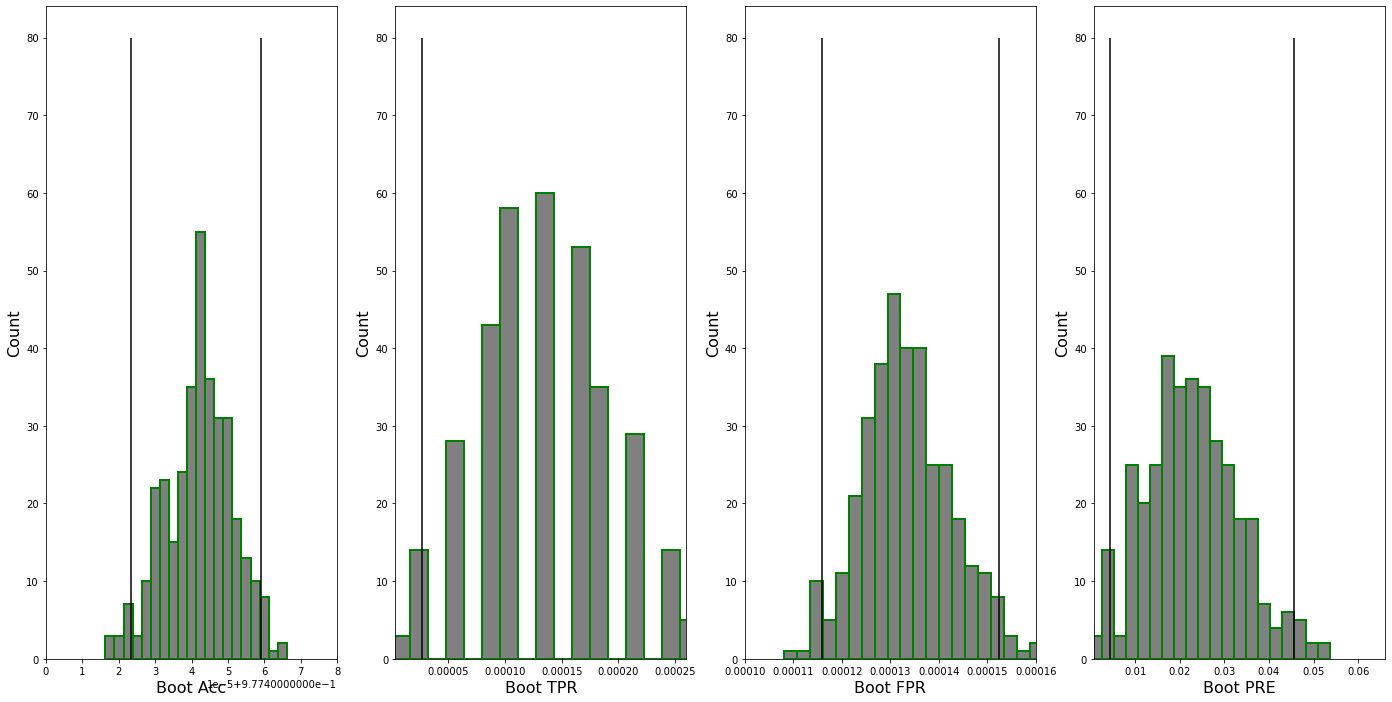

In [65]:
fig, axs = plt.subplots(ncols=4, figsize=(24,12))
#Plot Accuracy
axs[0].set_xlabel('Boot Acc', fontsize=16)
axs[0].set_ylabel('Count', fontsize=16)
axs[0].hist(bs_output.iloc[:,0], bins=20,edgecolor='green', linewidth=2,color = "grey")
axs[0].set_xlim([0.9774,0.97748])
axs[0].vlines(x=CI_acc[0], ymin = 0, ymax =80, color = "black")
axs[0].vlines(x=CI_acc[1], ymin = 0, ymax =80, color = "black")

#Plot TPR
axs[1].set_xlabel('Boot TPR', fontsize=16)
axs[1].set_ylabel('Count', fontsize=16)
axs[1].hist(bs_output.iloc[:,1], bins=20,edgecolor='green', linewidth=2,color = "grey")
axs[1].set_xlim([3.3e-06,0.00026])
axs[1].vlines(x=CI_TPR[0], ymin = 0, ymax =80, color = "black")
axs[1].vlines(x=CI_TPR[1], ymin = 0, ymax =80, color = "black")

#Plot FPR
axs[2].set_xlabel('Boot FPR', fontsize=16)
axs[2].set_ylabel('Count', fontsize=16)
axs[2].hist(bs_output.iloc[:,2], bins=20,edgecolor='green', linewidth=2,color = "grey")
axs[2].set_xlim([0.0001,0.000160])
axs[2].vlines(x=CI_FPR[0], ymin = 0, ymax =80, color = "black")
axs[2].vlines(x=CI_FPR[1], ymin = 0, ymax =80, color = "black")

#Plot Precision
axs[3].set_xlabel('Boot PRE', fontsize=16)
axs[3].set_ylabel('Count', fontsize=16)
axs[3].hist(bs_output.iloc[:,3], bins=20,edgecolor='green', linewidth=2,color = "grey")
axs[3].set_xlim([0.0008,0.066])
axs[3].vlines(x=CI_PRE[0], ymin = 0, ymax =80, color = "black")
axs[3].vlines(x=CI_PRE[1], ymin = 0, ymax =80, color = "black")

In [ ]:
print("The 95-percent confidence interval of ACC is %s" % CI_acc)
print("The 95-percent confidence interval of TPR is %s" % CI_TPR)
print("The 95-percent confidence interval of FPR is %s" % CI_FPR)
print("The 95-percent confidence interval of PRE is %s" % CI_PRE)

The 95-percent confidence interval of ACC is [0.97742626 0.97745864]
The 95-percent confidence interval of TPR is [2.64606266e-05 2.45422312e-04]
The 95-percent confidence interval of FPR is [0.00011596 0.00014881]
The 95-percent confidence interval of PRE is [0.00511296 0.04202761]


In [ ]:
# Table  bootstrap results
bootstrap_data = {'Accuracy':[CI_acc[0],CI_acc[1],mean_acc,std_acc],'TPR':[CI_TPR[0],CI_TPR[1],mean_TPR,std_TPR],
                 'FPR':[CI_FPR[0],CI_FPR[1],mean_FPR,std_FPR],'PRE':[CI_PRE[0],CI_PRE[1],mean_PRE,std_PRE]}
bootstrap_table = pd.DataFrame(data = bootstrap_data, index = ['0.025 quantile','0.975 quantile',
                                                               'Mean','Standard Deviation']).transpose()
bootstrap_table.style.set_properties(**{'font-size': '12pt',}).set_table_styles([{'selector': 'th', 'props': [('font-size', '10pt')]}])
bootstrap_table

,0.025 quantile,0.975 quantile,Mean,Standard Deviation
Accuracy,0.977426,0.977459,0.977444,0.000009
TPR,0.000026,0.000245,0.000133,0.000058
FPR,0.000116,0.000149,0.000132,0.000009
PRE,0.005113,0.042028,0.022621,0.009811
